In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris


# Load Iris dataset
iris = load_iris()
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column
df['class'] = iris.target

#df['species'] = df['class'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

# Display first rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# check dataset has missing values or not isnull is
df.isnull().sum().sort_values(ascending=False)

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
class,0


In [6]:
# check dataset has duplicate values or not
df.duplicated().sum()

1

In [7]:
# This command is to see the descriptive summary of the dataset only for numerical columns
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# seperate input variable and a target variable
X=df.drop('class',axis=1)
y=df['class']

In [9]:
# standard scaling all the colums to reduce the effect of outliers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scale the train_data and test_data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# check weather the dataset is balanced or not
df['class'].value_counts(normalize=True)

,proportion
class,
0,0.333333
1,0.333333
2,0.333333


In [11]:
# step 1 is build the basic model
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay \
, precision_score, recall_score, f1_score, classification_report

In [12]:
# intialize the model
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# train the model
lr.fit(X_train_scaled,y_train)

# prrect the model
y_pred=lr.predict(X_test_scaled)

Accuracy 0.9333333333333333
precision_score_basic 0.9333333333333333
recall_score_basic 0.9333333333333333
f1_score_basic 0.9333333333333333

confusion_matrix_basic 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]



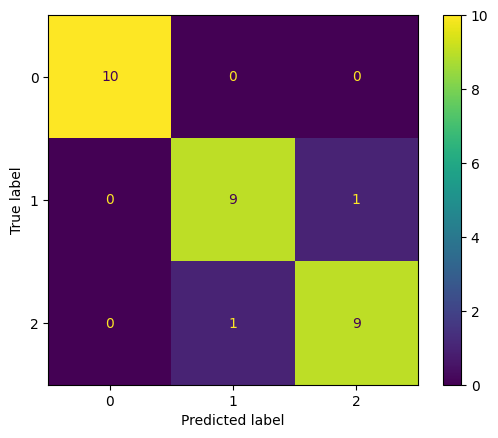

In [13]:
print('Accuracy',accuracy_score(y_test,y_pred))
print('precision_score_basic',precision_score(y_test,y_pred, average='weighted')) # Changed line
print('recall_score_basic',recall_score(y_test,y_pred, average='weighted')) # Changed line
print('f1_score_basic',f1_score(y_test,y_pred, average='weighted')) # Changed line
print()
print('confusion_matrix_basic \n',confusion_matrix(y_test,y_pred))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.show()

In [14]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [16]:
# Save the model and scaler
import pickle
pickle.dump(scaler, open('scaler_diab.pkl', 'wb'))
pickle.dump(lr, open('model_diab.pkl', 'wb'))